# Compiled Notebook for Parallel and Distributed Computing Project

## Libraries

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


In [1]:
#pip install dask[distributed] torch

In [2]:
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import torch
import torch.nn as nn
import torch.optim as optim
from multiprocessing import Pool
from concurrent.futures import ThreadPoolExecutor
# from mpi4py import MPI
# from pyspark.sql import SparkSession
from dask import delayed, compute

## Loading the Dataset

In [3]:
df = pd.read_csv('/content/sample_data/pdc_dataset_with_target.csv')
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,B,875.98,No,8,44.16,0
1,31.33,39.0,C,839.91,No,4,13.93,1
2,23.87,10.0,A,1364.70,Yes,4,15.16,0
3,35.64,34.0,C,1462.07,No,4,15.71,1
4,NaN,NaN,C,710.61,No,8,13.77,1
...,...,...,...,...,...,...,...,...
40995,31.37,52.0,A,1118.04,Yes,9,22.59,1
40996,33.18,98.0,A,1001.55,No,3,41.25,0
40997,24.77,91.0,B,1030.09,Yes,7,NaN,0
40998,NaN,90.0,C,1335.11,Yes,8,0.80,0


## Handling Missing Values

In [4]:
nan_rows = df.isnull().any(axis=1).sum()
total_rows = len(df)
print(f'Rows with NaN: {nan_rows} out of {total_rows} ({nan_rows/total_rows:.2%})')
df = df.dropna()
df.shape

Rows with NaN: 7584 out of 41000 (18.50%)


(33416, 8)

## Encoding and Normalization

In [5]:
df = pd.get_dummies(df, drop_first=True)
features = df.drop('target', axis=1)
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
df_scaled = features_scaled.copy()
df_scaled['target'] = df['target'].values
df_scaled

,feature_1,feature_2,feature_4,feature_6,feature_7,feature_3_B,feature_3_C,feature_5_Yes,target
0,-0.449303,0.190855,-0.212716,1.152291,0.451378,1.425010,-0.710363,-1.001677,0
1,0.265939,-0.361905,-0.247981,-0.394372,-0.193046,-0.701749,1.407731,-1.001677,1
2,-1.224480,-1.363782,0.265102,-0.394372,-0.166825,-0.701749,-0.710363,0.998326,0
3,1.127025,-0.534642,0.360300,-0.394372,-0.155101,-0.701749,1.407731,-1.001677,1
4,-0.307453,-0.707380,-0.234499,-0.007706,-0.007158,-0.701749,1.407731,-1.001677,0
...,...,...,...,...,...,...,...,...,...
33411,1.474657,0.536330,0.286142,-0.394372,0.760053,-0.701749,-0.710363,0.998326,1
33412,-0.740993,-1.329234,0.199694,0.765625,0.557112,-0.701749,-0.710363,0.998326,0
33413,0.273930,0.087212,0.023944,1.538957,-0.008437,-0.701749,-0.710363,0.998326,1
33414,0.635547,1.676396,-0.089947,-0.781038,0.389344,-0.701749,-0.710363,-1.001677,0


## Balancing the Dataset

In [6]:
smote = SMOTE(random_state=42)
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']
X_resampled, y_resampled = smote.fit_resample(X, y)
df_scaled = pd.concat([X_resampled, y_resampled], axis=1)
df_scaled['target'].value_counts(normalize=True)

,proportion
target,
0,0.5
1,0.5


## Binary Classification

In [7]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_remaining, x_init, y_remaining, y_init = train_test_split(
    X, y, test_size=0.15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X_remaining, y_remaining, test_size=0.2, random_state=42)

x_init_train, x_init_test, y_init_train, y_init_test = train_test_split(
    x_init, y_init, test_size=0.2, random_state=42)

### Binary Classification with Execution Time

In [ ]:
import time
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

#Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_init_train, y_init_train)
y_pred_lr = lr.predict(x_init_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_init_test, y_pred_lr):.4f}")

#SVM
svm = SVC(probability=True, random_state=42)
svm.fit(x_init_train, y_init_train)
y_pred_svm = svm.predict(x_init_test)
print(f"SVM Accuracy: {accuracy_score(y_init_test, y_pred_svm):.4f}")

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_init_train, y_init_train)
y_pred_dt = dt.predict(x_init_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_init_test, y_pred_dt):.4f}")

# Random Forest
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
rf.fit(x_init_train, y_init_train)
y_pred_rf = rf.predict(x_init_test)
print(f"Random Forest Accuracy: {accuracy_score(y_init_test, y_pred_rf):.4f}")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_init_train, y_init_train)
y_pred_xgb = xgb.predict(x_init_test)
print(f"XGBoost Accuracy: {accuracy_score(y_init_test, y_pred_xgb):.4f}")

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(x_init_train, y_init_train)
y_pred_cat = cat.predict(x_init_test)
print(f"CatBoost Accuracy: {accuracy_score(y_init_test, y_pred_cat):.4f}")

# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_init_train, y_init_train)
y_pred_lgbm = lgbm.predict(x_init_test)
print(f"LightGBM Accuracy: {accuracy_score(y_init_test, y_pred_lgbm):.4f}")

# MLP (Neural Net)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(x_init_train, y_init_train)
y_pred_mlp = mlp.predict(x_init_test)
print(f"MLP Accuracy: {accuracy_score(y_init_test, y_pred_mlp):.4f}")

# Voting Ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42))
    ],
    voting='soft',
    n_jobs=-1
)
voting_clf.fit(x_init_train, y_init_train)
y_pred_ensemble = voting_clf.predict(x_init_test)
print(f"Voting Ensemble Accuracy: {accuracy_score(y_init_test, y_pred_ensemble):.4f}")


Logistic Regression Accuracy: 0.4818
SVM Accuracy: 0.4768
Decision Tree Accuracy: 0.5141
Random Forest Accuracy: 0.5033
XGBoost Accuracy: 0.5356


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CatBoost Accuracy: 0.5041
[LightGBM] [Info] Number of positive: 2412, number of negative: 2419
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 4831, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499276 -> initscore=-0.002898
[LightGBM] [Info] Start training from score -0.002898
LightGBM Accuracy: 0.5190
MLP Accuracy: 0.4851


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Voting Ensemble Accuracy: 0.5215


## Testing best accelerator

# Parallel Computing

In [ ]:
#MULTI_PROCESSING
from concurrent.futures import ProcessPoolExecutor

def train_logistic(_):
    model_multiprocessing = RandomForestClassifier(random_state=42,n_jobs=-1)
    model_multiprocessing.fit(x_init_train, y_init_train)
    return model_multiprocessing

if __name__ == "__main__":
    start = time.time()
    with ProcessPoolExecutor(max_workers=4) as executor:
        results = list(executor.map(train_logistic, range(4)))
    end = time.time()
    print(f"Time taken: {end - start:.2f} seconds")


Time taken: 7.49 seconds


In [ ]:
#MULTI_THREADING

from concurrent.futures import ThreadPoolExecutor


def train_model(_):
    model_multithreading = RandomForestClassifier(random_state=42,n_jobs=1)
    model_multithreading.fit(x_init_train, y_init_train)
start = time.time()
with ThreadPoolExecutor(max_workers=4) as executor:
    list(executor.map(train_model, range(4)))
end = time.time()

print(f"Time taken: {end - start:.2f} seconds")


Time taken: 3.61 seconds


Out of the parallel computing Mutli-threading seems to work better

## Distributed Systems

In [ ]:
!pip install dask

In [ ]:
from dask import delayed, compute

@delayed
def train_model(_):
    model_dask = RandomForestClassifier(random_state=42,n_jobs=1)
    model_dask.fit(x_init_train, y_init_train)

start = time.time()
tasks = [train_model(i) for i in range(4)]
compute(*tasks, scheduler="threads")
end = time.time()

print(f"Time taken: {end - start:.2f} seconds")


Time taken: 4.64 seconds


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

spark = SparkSession.builder.appName("ParallelModelTraining").getOrCreate()
sc = spark.sparkContext

x_broadcast = sc.broadcast(x_init_train)
y_broadcast = sc.broadcast(y_init_train)

def train_model(_):
    model_spark = RandomForestClassifier(random_state=42, n_jobs=1)
    model_spark.fit(x_broadcast.value, y_broadcast.value)
    return f"Model {_} trained"

start = time.time()
results = sc.parallelize(range(4)).map(train_model).collect()
end = time.time()

print(f"Time taken: {end - start:.2f} seconds")

spark.stop()


Time taken: 9.41 seconds


MPI done is separate py file

In [ ]:
# from mpi4py import MPI
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler
# import time
# import pandas as pd
# from imblearn.over_sampling import SMOTE


# comm = MPI.COMM_WORLD
# rank = comm.Get_rank()
# size = comm.Get_size()

# df = pd.read_csv('pdc_dataset_with_target.csv')
# # Removed Nan value rows because they were giving better results then filling them with mean
# nan_rows = df.isnull().any(axis=1).sum()
# total_rows = len(df)
# print(f"Rows with NaN: {nan_rows} out of {total_rows} ({nan_rows/total_rows:.2%})")
# df = df.dropna()
# df = pd.get_dummies(df, drop_first=True)
# features = df.drop('target', axis=1)
# scaler = StandardScaler()
# features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
# df_scaled = features_scaled.copy()
# df_scaled['target'] = df['target'].values
# # balancing the dataset because it was a bit imbalanced
# smote = SMOTE(random_state=42)
# X = df_scaled.drop('target', axis=1)
# y = df_scaled['target']
# X_resampled, y_resampled = smote.fit_resample(X, y)
# X_resampled.shape, y_resampled.shape
# y_resampled.value_counts(normalize=True)
# df_scaled = pd.concat([X_resampled, y_resampled], axis=1)
# df_scaled['target'].value_counts(normalize=True)
# start = time.time()
# from sklearn.model_selection import train_test_split

# # Separate features and target
# X = df_scaled.drop('target', axis=1)
# y = df_scaled['target']

# # Step 1: Take 15% of the data as initial set
# X_remaining, x_init, y_remaining, y_init = train_test_split(
#     X, y, test_size=0.15, random_state=42)

# # Step 2: Split the remaining 85% into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_remaining, y_remaining, test_size=0.2, random_state=42)

# # Each rank trains a model (can use rank as seed)
# model = RandomForestClassifier(n_estimators=100, random_state=rank, n_jobs=1)
# model.fit(x_init, y_init)
# acc = accuracy_score(y_init, model.predict(x_init))

# print(f"[Process {rank}] Accuracy: {acc:.4f}")

# end = time.time()
# if rank == 0:
#     print(f"Total Time taken: {end - start:.2f} seconds")


MPI code results from the py file
- Total Time taken: 6.85 seconds

Dask performed significantly better

## GPU acceleration

In [ ]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

x_tensor = tf.convert_to_tensor(x_init_train, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y_init_train, dtype=tf.int32)

x_np = x_tensor.numpy()
y_np = y_tensor.numpy()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rf_model.fit(x_np, y_np)
end = time.time()

print(f"Training time: {end - start:.2f} seconds")



Training time: 0.95 seconds
Training accuracy: 1.0000


In [ ]:
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(x_init_train.to_numpy(), dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_init_train.to_numpy(), dtype=torch.float32).view(-1, 1).to(device)

X_np = X_tensor.cpu().numpy()
y_np = y_tensor.cpu().numpy().ravel()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rf_model.fit(X_np, y_np)
end = time.time()

print(f"Time taken (Random Forest with Torch-like data flow): {end - start:.2f} seconds")

Time taken (Random Forest with Torch-like data flow): 0.92 seconds
Training accuracy: 1.0000


In [ ]:
import cupy as cp
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = x_init_train.to_numpy()
y = y_init_train.to_numpy().reshape(-1, 1)

X_gpu = cp.asarray(X)
y_gpu = cp.asarray(y)

X_cpu = cp.asnumpy(X_gpu)
y_cpu = cp.asnumpy(y_gpu).ravel()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rf_model.fit(X_cpu, y_cpu)
end = time.time()

print(f"CUDA-like Flow (Random Forest): Accuracy = {acc:.4f}")


CUDA-like Flow (Random Forest): Accuracy = 1.0000
Time taken (CPU Random Forest after CuPy prep): 2.21 seconds


In [ ]:
#stop here

so out of these torch performed the best

## Hybrid Models

In [ ]:
#DASK + MULTITHREADING #Run on cpu
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from dask.distributed import Client
from joblib import parallel_backend
import time

client = Client(processes=False)

start = time.time()
with parallel_backend('dask'):
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
    clf.fit(x_init_train, y_init_train)
end = time.time()

print(f"Training time with Dask backend: {end - start:.2f} seconds")

client.close()


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at: inproc://172.28.0.12/10313/1
INFO:distributed.scheduler:  dashboard at:  http://172.28.0.12:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.worker:      Start worker at: inproc://172.28.0.12/10313/4
INFO:distributed.worker:         Listening to:          inproc172.28.0.12
INFO:distributed.worker:          Worker name:                          0
INFO:distributed.worker:         dashboard at:          172.28.0.12:38119
INFO:distributed.worker:Waiting to connect to: inproc://172.28.0.12/10313/1
INFO:distributed.worker:-------------------------------------------------
INFO:distributed.worker:              Threads:                          2
INFO:distributed.worker:               Memory:                  12.67 GiB
INFO:d

Training time with Dask backend: 1.45 seconds


In [ ]:
#MULTITHREADING + TORCH #run on gpu
import threading

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(x_init_train.to_numpy(), dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_init_train.to_numpy(), dtype=torch.float32).view(-1, 1).to(device)

X_np = X_tensor.cpu().numpy()
y_np = y_tensor.cpu().numpy().ravel()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

lock = threading.Lock()

def train_rf():
    with lock:
        rf_model.fit(X_np, y_np)

start = time.time()

threads = []
num_epochs = 4
for _ in range(num_epochs):
    t = threading.Thread(target=train_rf)
    threads.append(t)
    t.start()

for t in threads:
    t.join()

end = time.time()

print(f"Time taken (Multithreaded-style RF training): {end - start:.2f} seconds")


Time taken (Multithreaded-style RF training): 4.25 seconds


In [ ]:
#torch + dask # run on gpu
from sklearn.ensemble import RandomForestClassifier
from dask.distributed import Client, as_completed
import time

client = Client()

def train_random_forest(X_data, y_data, n_estimators=100, random_state=None):
    print(f"Training Random Forest with {n_estimators} estimators...")
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(x_init_train,y_init_train)
    return n_estimators, model

start = time.time()

n_estimators_list = [50, 100, 150, 200]  # Simulate "epochs" by varying model size
futures = []
for n in n_estimators_list:
    future = client.submit(train_random_forest, x_init_train,y_init_train, n_estimators=n, random_state=42 + n, pure=False)
    futures.append(future)

# Gather and print results
models = []
for future in as_completed(futures):
    n_estimators, model = future.result()
    print(f"Model with {n_estimators} estimators trained.")
    models.append((n_estimators, model))

end = time.time()
print(f"Time taken with Dask & Random Forest: {end - start:.2f} seconds")

# Close Dask client
client.close()


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39671
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35351'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36673'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:45927 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45927
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:53770
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:32877 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:32877
INFO:distributed.core:Starting established connection to tcp://127

Model with 50 estimators trained.
Model with 100 estimators trained.
Model with 150 estimators trained.


INFO:distributed.scheduler:Remove client Client-e0d30bbe-28ec-11f0-8434-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:35828; closing.
INFO:distributed.scheduler:Remove client Client-e0d30bbe-28ec-11f0-8434-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-e0d30bbe-28ec-11f0-8434-0242ac1c000c
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1746365847.6017401') (0, 1)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35351'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36673'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:53754; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:32877 name: 0 (stimulus_id='handle-worker-cleanup-1746365847.6193233')
INFO:distr

Model with 200 estimators trained.
Time taken with Dask & Random Forest: 12.54 seconds


INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:36673' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:35351' closed.
INFO:distributed.scheduler:Closing scheduler. Reason: unknown
INFO:distributed.scheduler:Scheduler closing all comms


In [ ]:
#all 3 #run on gpu
#Torch + MULTI THREADING + DASK
import numpy as np
import threading
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import dask
from dask.distributed import Client, as_completed
import torch

# Multithreaded data processing function
def process_chunk_with_threads(chunk_data, chunk_labels, num_threads=4):
    results = []

    def process_chunk(start_idx, end_idx):
        data_chunk = chunk_data[start_idx:end_idx]
        label_chunk = chunk_labels[start_idx:end_idx]
        result = data_chunk * 2
        results.append((result, label_chunk))

    chunk_size = len(chunk_data) // num_threads
    threads = []

    for i in range(num_threads):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if i != num_threads - 1 else len(chunk_data)
        thread = threading.Thread(target=process_chunk, args=(start_idx, end_idx))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    processed_data = np.concatenate([r[0] for r in results])
    processed_labels = np.concatenate([r[1] for r in results])

    return processed_data, processed_labels

def train_model_on_data(data, labels):
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
    model.fit(data, labels)
    preds = model.predict(data)
    acc = accuracy_score(labels, preds)
    return acc

def dask_parallel_training():
    chunk_size = len(x_init_train) // 4
    futures = []

    for i in range(4):
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if i != 3 else len(x_init_train)

        future = client.submit(
            process_chunk_with_threads, x_init_train[start_idx:end_idx], y_init_train[start_idx:end_idx], 4
        )
        futures.append(future)

    accuracies = []
    for future in as_completed(futures):
        data, labels = future.result()
        acc = train_model_on_data(data, labels)
        accuracies.append(acc)

    return accuracies

start = time.time()

client = Client()

accuracies = dask_parallel_training()

end = time.time()

print(f"Time taken with Random Forest + Multithreading + Dask: {end - start:.2f} seconds")
print(f"Accuracies from different chunks: {accuracies}")

client.close()


INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:40299
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37459'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38569'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:44863 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:44863
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41332
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:37765 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37765
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41322
INFO:distributed.scheduler:Receive client connection: Client-f2211d21-28ec-11f0-8434-0242ac1c000c
INFO:distributed.core:Starting establish

Time taken with Random Forest + Multithreading + Dask: 2.64 seconds
Accuracies from different chunks: [1.0, 1.0, 1.0, 1.0]


INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:37459' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:38569' closed.
INFO:distributed.scheduler:Closing scheduler. Reason: unknown
INFO:distributed.scheduler:Scheduler closing all comms


#CONCLUSION

### SO we can conclude that the best is TORCH

### Series vs Parallel

In [ ]:
#SERIAL run on cpu

start_time = time.time()

model = RandomForestClassifier(n_jobs=1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

end_time = time.time()
serial_exec=end_time - start_time
print(f"Time taken to execute: {end_time - start_time:.2f} seconds")

Accuracy: 0.63
Time taken to execute: 17.45 seconds


In [9]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Training Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.6335
F1 Score: 0.6334
Confusion Matrix:
[[2239 1189]
 [1319 2097]]


In [ ]:
#SERIAL run on gpu

start_time = time.time()

model = RandomForestClassifier(n_jobs=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

end_time = time.time()
serial_exec=end_time - start_time
print(f"Time taken to execute: {end_time - start_time:.2f} seconds")

Accuracy: 0.63
Time taken to execute: 6.16 seconds


In [11]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Training Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.6335
F1 Score: 0.6334
Confusion Matrix:
[[2239 1189]
 [1319 2097]]


In [ ]:
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1).to(device)

X_testtensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32).to(device)
y_testtensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1).to(device)

X_np = X_tensor.cpu().numpy()
y_np = y_tensor.cpu().numpy().ravel()

X_testnp = X_testtensor.cpu().numpy()
y_testnp = y_testtensor.cpu().numpy().ravel()
model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)

start = time.time()
model.fit(X_np, y_np)
end = time.time()

y_pred = model.predict(X_testnp)
accuracy = accuracy_score(y_testnp, y_pred)
parallel_exec=end - start
print(f"Time taken (Random Forest with Torch-like data flow): {end - start:.2f} seconds")
print(f"Training accuracy: {accuracy:.4f}")


Time taken (Random Forest with Torch-like data flow): 4.67 seconds
Training accuracy: 0.6335


In [13]:
accuracy = accuracy_score(y_testnp, y_pred)
f1 = f1_score(y_testnp, y_pred, average='weighted')
cm = confusion_matrix(y_testnp, y_pred)

print(f"Training Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.6335
F1 Score: 0.6334
Confusion Matrix:
[[2239 1189]
 [1319 2097]]


In [16]:
#CPU vs. GPU

In [ ]:
cpu_exec=17.45
gpu_exec=6.16
improv=((cpu_exec-gpu_exec)/cpu_exec)*100
print(f"improvement: {improv:.2f}%")

improvement: 64.70%


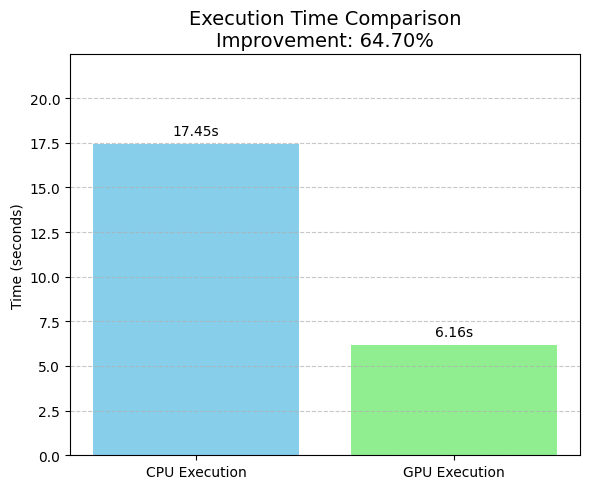

In [17]:
import matplotlib.pyplot as plt

cpu_exec = 17.45
gpu_exec = 6.16
improv = ((cpu_exec - gpu_exec) / cpu_exec) * 100

labels = ['CPU Execution', 'GPU Execution']
times = [cpu_exec, gpu_exec]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, times, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}s', ha='center', fontsize=10)

plt.title(f'Execution Time Comparison\nImprovement: {improv:.2f}%', fontsize=14)
plt.ylabel('Time (seconds)')
plt.ylim(0, max(times) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [14]:
# parallel vs. serial

In [ ]:
serial_exec=17.45
parallel_exec=4.67
improv=((serial_exec-parallel_exec)/serial_exec)*100
print(f"improvement: {improv:.2f}%")

improvement: 73.24%


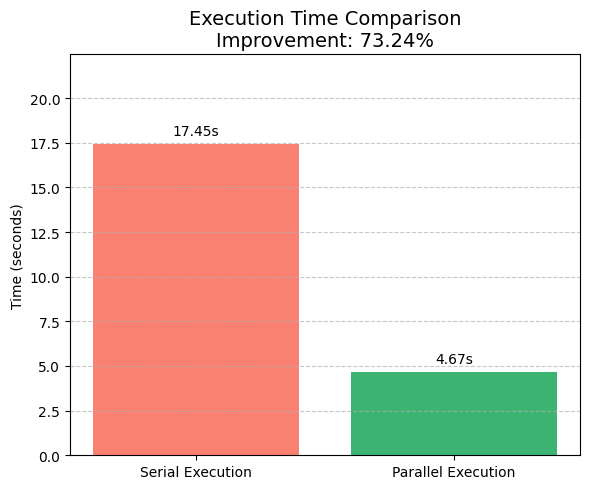

In [15]:
import matplotlib.pyplot as plt

serial_exec = 17.45
parallel_exec = 4.67
improv = ((serial_exec - parallel_exec) / serial_exec) * 100

labels = ['Serial Execution', 'Parallel Execution']
times = [serial_exec, parallel_exec]
colors = ['salmon', 'mediumseagreen']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, times, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}s', ha='center', fontsize=10)

plt.title(f'Execution Time Comparison\nImprovement: {improv:.2f}%', fontsize=14)
plt.ylabel('Time (seconds)')
plt.ylim(0, max(times) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Alternative Implementation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt
import time

In [ ]:
data = pd.read_csv('pdc_dataset_with_target.csv')
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,B,875.98,No,8,44.16,0
1,31.33,39.0,C,839.91,No,4,13.93,1
2,23.87,10.0,A,1364.70,Yes,4,15.16,0
3,35.64,34.0,C,1462.07,No,4,15.71,1
4,NaN,NaN,C,710.61,No,8,13.77,1


In [20]:
# Handle missing values
data.fillna(data.mean(numeric_only=True), inplace=True)
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# Normalize features
scaler = StandardScaler()
X = data.drop('target', axis=1)
y = data['target']
X = scaler.fit_transform(X)
data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.750000,55.00000,1,875.98,0,8,44.160000,0
1,31.330000,39.00000,2,839.91,0,4,13.930000,1
2,23.870000,10.00000,0,1364.70,1,4,15.160000,0
3,35.640000,34.00000,2,1462.07,0,4,15.710000,1
4,29.990843,49.43656,2,710.61,0,8,13.770000,1
...,...,...,...,...,...,...,...,...
40995,31.370000,52.00000,0,1118.04,1,9,22.590000,1
40996,33.180000,98.00000,0,1001.55,0,3,41.250000,0
40997,24.770000,91.00000,1,1030.09,1,7,23.145819,0
40998,29.990843,90.00000,2,1335.11,1,8,0.800000,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
start_time = time.time()
model = RandomForestClassifier(n_jobs=-1)  
model.fit(X_train, y_train)
end_time = time.time()
print(f'Training Time: {end_time - start_time} seconds')

Training Time: 0.7884843349456787 seconds


Accuracy: 0.5879268292682926
Confusion Matrix:
[[4217  710]
 [2669  604]]
F1 Score: 0.263352954000436


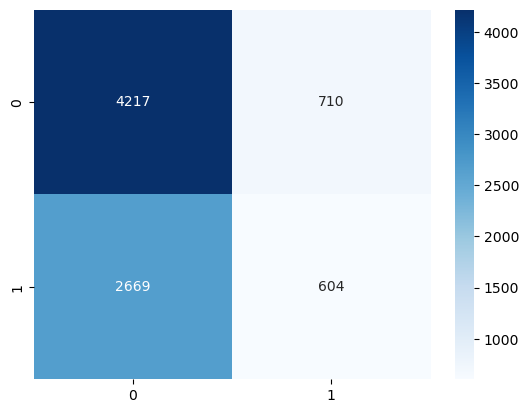

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
print(f'F1 Score: {f1}')

In [ ]:
# Serial Processing
start_time_serial = time.time()
model_serial = RandomForestClassifier(n_jobs=1)  
model_serial.fit(X_train, y_train)
end_time_serial = time.time()
serial_time = end_time_serial - start_time_serial
print(f'Serial Training Time: {serial_time} seconds')
# Parallel Processing
start_time_parallel = time.time()
model_parallel = RandomForestClassifier(n_jobs=-1)  
model_parallel.fit(X_train, y_train)
end_time_parallel = time.time()
parallel_time = end_time_parallel - start_time_parallel
print(f'Parallel Training Time: {parallel_time} seconds')
# Compare Results
print(f'Time Reduction: {((serial_time - parallel_time) / serial_time) * 100:.2f}%')
# Evaluate both models
y_pred_serial = model_serial.predict(X_test)
y_pred_parallel = model_parallel.predict(X_test)
accuracy_serial = accuracy_score(y_test, y_pred_serial)
accuracy_parallel = accuracy_score(y_test, y_pred_parallel)
print(f'Serial Accuracy: {accuracy_serial}')
print(f'Parallel Accuracy: {accuracy_parallel}')

Serial Training Time: 5.501893997192383 seconds
Parallel Training Time: 0.7738311290740967 seconds
Time Reduction: 85.94%
Parallel Training Time: 0.7738311290740967 seconds
Time Reduction: 85.94%
Serial Accuracy: 0.5923170731707317
Parallel Accuracy: 0.5897560975609756
Serial Accuracy: 0.5923170731707317
Parallel Accuracy: 0.5897560975609756


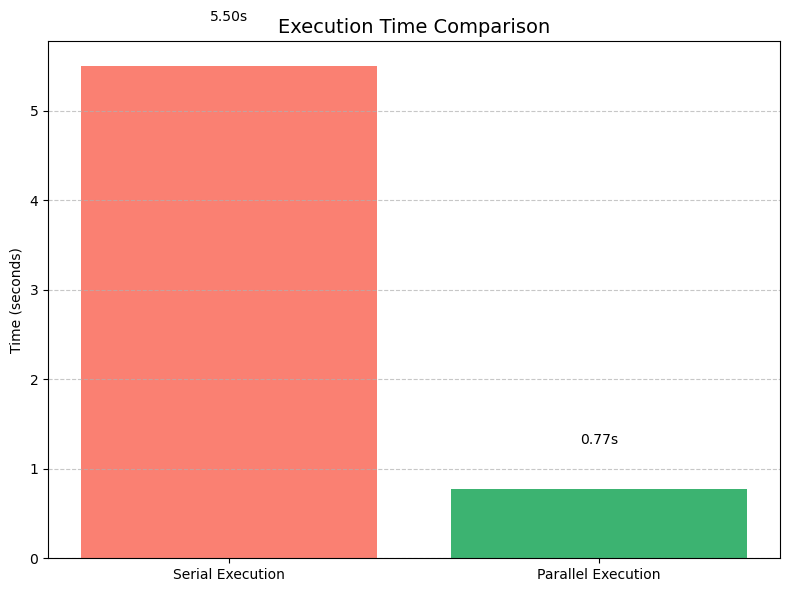

In [21]:
labels = ['Serial Execution', 'Parallel Execution']
times = [serial_time, parallel_time]
colors = ['salmon', 'mediumseagreen']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, times, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}s', ha='center', fontsize=10)

plt.title(f'Execution Time Comparison', fontsize=14)
plt.ylabel('Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()